Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.22798395156860352s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 

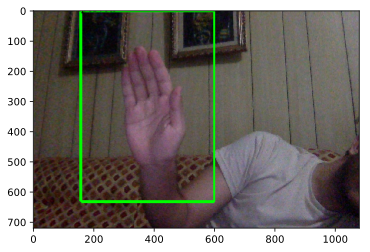

In [4]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

options = {"model": "cfg/tiny-yolo-voc.cfg","load":'bin/tiny-yolo-voc.weights', 'threshold':0.1 ,"gpu":1.0}

tfnet = TFNet(options)

img = cv2.imread('live.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()
# def boxing(original_img, predictions):
#     newImage = cv2.imread(original_img, cv2.IMREAD_COLOR)

#     for result in predictions:
#         top_x = result['topleft']['x']
#         top_y = result['topleft']['y']

#         btm_x = result['bottomright']['x']
#         btm_y = result['bottomright']['y']

#         confidence = result['confidence']
#         label = result['label'] + " " + str(round(confidence, 3))
#         if confidence > 0.1:
#             newImage = cv2.rectangle(newImage,(top_x,top_y),(btm_x,btm_y),(0, 255, 0), 7) #cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 15)
#             newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 1, (0, 0, 0), 2)
            
#     return newImage

# options = {"model": "cfg/tiny-yolo-voc-1c.cfg","load":1655, "threshold": 0.0001, "gpu":1.0}

# tfnet = TFNet(options)

# imgcv = cv2.imread("live.jpg")
# imgcv= imgcv.resize((1280,720))
# result = tfnet.return_predict(imgcv)
# img = boxing(imgcv,result)
# plt.imshow(img)